In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [28]:
individual_stats = pd.read_csv('individual_stats.csv')
individual_stats.head()

,Date,Team,Opponent,Player,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP,Win
0,12/3/2020,Kaukauna,Appleton North,4,31,21,12,3,1,2,3,5,35,0.535714286,18.75,19.97142857,Yes
1,12/4/2020,Kaukauna,Oshkosh West,4,35,13,5,3,0,3,3,3,15,0.421052632,6.315789474,7.275789474,Yes
2,12/8/2020,Kaukauna,Appleton East,4,34,22,12,6,0,4,4,5,40,0.545454545,21.81818182,24.30545455,Yes
3,12/11/2020,Kaukauna,Hortonville,4,44,7,2,6,2,5,7,5,6,0.5,3,5.28,Yes
4,12/12/2020,Kaukauna,De Pere,4,36,14,6,5,0,1,1,1,20,0.55,11,13.09,No


In [29]:
individual_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   187 non-null    object
 1   Team                   187 non-null    object
 2   Opponent               187 non-null    object
 3   Player                 187 non-null    int64 
 4   Minutes                187 non-null    int64 
 5   FieldGoalAttempts      187 non-null    int64 
 6   FieldGoalMade          187 non-null    int64 
 7   Assits                 187 non-null    int64 
 8   OffensiveRebounds      187 non-null    int64 
 9   DefensiveRebounds      187 non-null    int64 
 10  TotalRebounds          187 non-null    int64 
 11  Turnovers              187 non-null    int64 
 12  Points                 187 non-null    int64 
 13  OffensiveEfficiency    187 non-null    object
 14  EfficientPointsScored  187 non-null    object
 15  RawEOP                 

In [38]:
individual_stats[['OffensiveEfficiency', 'EfficientPointsScored', 'RawEOP']] = individual_stats[['OffensiveEfficiency', 'EfficientPointsScored', 'RawEOP']].apply(pd.to_numeric) 
individual_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   187 non-null    object 
 1   Team                   187 non-null    object 
 2   Opponent               187 non-null    object 
 3   Player                 187 non-null    int64  
 4   Minutes                187 non-null    int64  
 5   FieldGoalAttempts      187 non-null    int64  
 6   FieldGoalMade          187 non-null    int64  
 7   Assits                 187 non-null    int64  
 8   OffensiveRebounds      187 non-null    int64  
 9   DefensiveRebounds      187 non-null    int64  
 10  TotalRebounds          187 non-null    int64  
 11  Turnovers              187 non-null    int64  
 12  Points                 187 non-null    int64  
 13  OffensiveEfficiency    187 non-null    float64
 14  EfficientPointsScored  187 non-null    float64
 15  RawEOP

In [39]:
# Replace #DIV/0! with 0s
individual_stats = individual_stats.replace('#DIV/0!', 0)
individual_stats.tail()

,Date,Team,Opponent,Player,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP,Win
182,12/29/2020,Kaukauna,Pius XI Catholic,30,1,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,Yes
183,1/16/2021,Kaukauna,Tomah,30,2,0,0,0,0,2,2,1,0,0.000000,0.0,0.000000,No
184,1/22/2021,Kaukauna,Hortonville,30,4,2,0,1,0,0,0,0,0,0.333333,0.0,0.253333,Yes
185,1/23/2021,Kaukauna,Appleton West,30,3,0,0,0,0,0,0,1,2,0.000000,0.0,0.000000,Yes
186,1/29/2021,Kaukauna,Kimberly,30,2,0,0,0,0,0,0,0,1,0.000000,0.0,0.000000,No


In [62]:
# Make numeric data frame
individual_num = individual_stats.drop(columns = ['Team', 'Opponent'])
dummy = pd.get_dummies(individual_num['Win'])
individual_num = pd.concat([individual_num, dummy], axis = 1)
individual_num = individual_num.drop(columns = ['Win', 'Ue'])
individual_num = individual_num.rename(columns = {'Yes' : "Win", 'No' : "Loss"})
individual_num = individual_num[individual_num['Minutes'] >=4]
individual_num = individual_num[individual_num['OffensiveEfficiency'] < 1]
individual_num

,Date,Player,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
0,12/3/2020,4,31,21,12,3,1,2,3,5,35,0.535714,18.750000,19.971429,0,1
1,12/4/2020,4,35,13,5,3,0,3,3,3,15,0.421053,6.315789,7.275789,0,1
2,12/8/2020,4,34,22,12,6,0,4,4,5,40,0.545455,21.818182,24.305455,0,1
3,12/11/2020,4,44,7,2,6,2,5,7,5,6,0.500000,3.000000,5.280000,0,1
4,12/12/2020,4,36,14,6,5,0,1,1,1,20,0.550000,11.000000,13.090000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,12/23/2020,24,14,4,1,0,0,0,0,0,4,0.250000,1.000000,1.000000,1,0
175,1/23/2021,24,5,1,0,1,0,0,0,0,0,0.500000,0.000000,0.380000,0,1
177,12/3/2020,30,6,0,0,0,0,1,1,0,0,0.000000,0.000000,0.000000,0,1
179,12/15/2020,30,4,0,0,0,0,0,0,1,0,0.000000,0.000000,0.000000,1,0


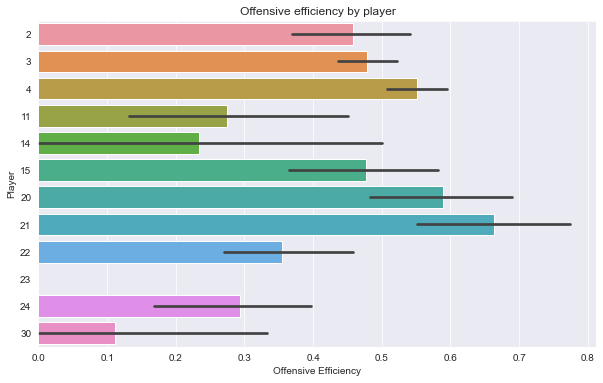

In [72]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="OffensiveEfficiency", y="Player", data=individual_num, orient = 'h')
plt.xlabel("Offensive Efficiency")
plt.ylabel("Player")
plt.title("Offensive efficiency by player");

Text(0.5, 1.0, 'Offensive efficiency v. Raw efficient offensive production')

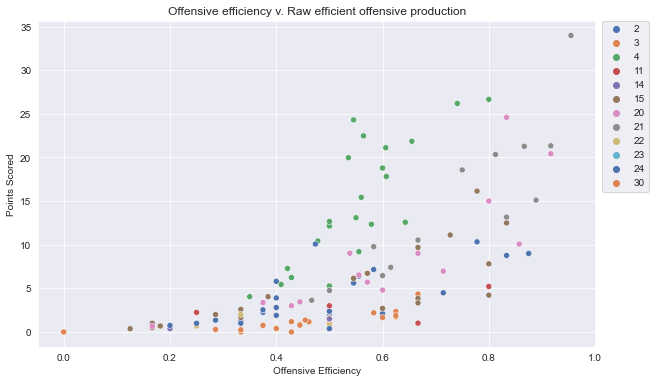

In [107]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(x="OffensiveEfficiency", 
                y="RawEOP", 
                hue="Player",
                data=individual_num, palette = "deep")
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
#place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Offensive efficiency v. Raw efficient offensive production")

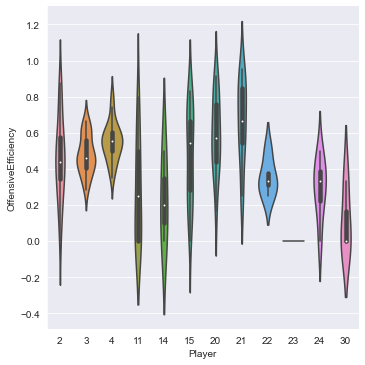

In [78]:
sns.catplot(x = "Player", y = "OffensiveEfficiency", data = individual_num, kind = 'violin');

In [86]:
individual_corr = individual_num.drop(columns = 'Player')
correlations = individual_corr.corr()
correlations

,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
Minutes,1.000000,0.698193,0.648184,0.520638,0.373290,0.523878,0.533976,0.461017,0.591940,0.492509,0.533788,0.544971,-0.035024,0.045604
FieldGoalAttempts,0.698193,1.000000,0.879954,0.649986,0.309478,0.333725,0.366766,0.331554,0.819233,0.438893,0.732212,0.739346,-0.003732,0.021055
FieldGoalMade,0.648184,0.879954,1.000000,0.586740,0.421849,0.430262,0.481343,0.359180,0.891565,0.640616,0.895921,0.883472,-0.115498,0.130685
Assits,0.520638,0.649986,0.586740,1.000000,0.177107,0.245846,0.251301,0.384716,0.682217,0.448007,0.657981,0.740485,-0.088939,0.088674
OffensiveRebounds,0.373290,0.309478,0.421849,0.177107,1.000000,0.522041,0.765228,0.240741,0.319742,0.489835,0.455800,0.446357,-0.060195,0.069044
DefensiveRebounds,0.523878,0.333725,0.430262,0.245846,0.522041,1.000000,0.948556,0.328103,0.416942,0.376579,0.451557,0.439017,-0.178909,0.191488
TotalRebounds,0.533976,0.366766,0.481343,0.251301,0.765228,0.948556,1.000000,0.337007,0.433386,0.466061,0.510019,0.497048,-0.157380,0.170159
Turnovers,0.461017,0.331554,0.359180,0.384716,0.240741,0.328103,0.337007,1.000000,0.361594,0.070207,0.269926,0.286086,-0.125503,0.137129
Points,0.591940,0.819233,0.891565,0.682217,0.319742,0.416942,0.433386,0.361594,1.000000,0.547778,0.951172,0.943772,-0.102884,0.116354
OffensiveEfficiency,0.492509,0.438893,0.640616,0.448007,0.489835,0.376579,0.466061,0.070207,0.547778,1.000000,0.673305,0.674785,-0.145985,0.134244


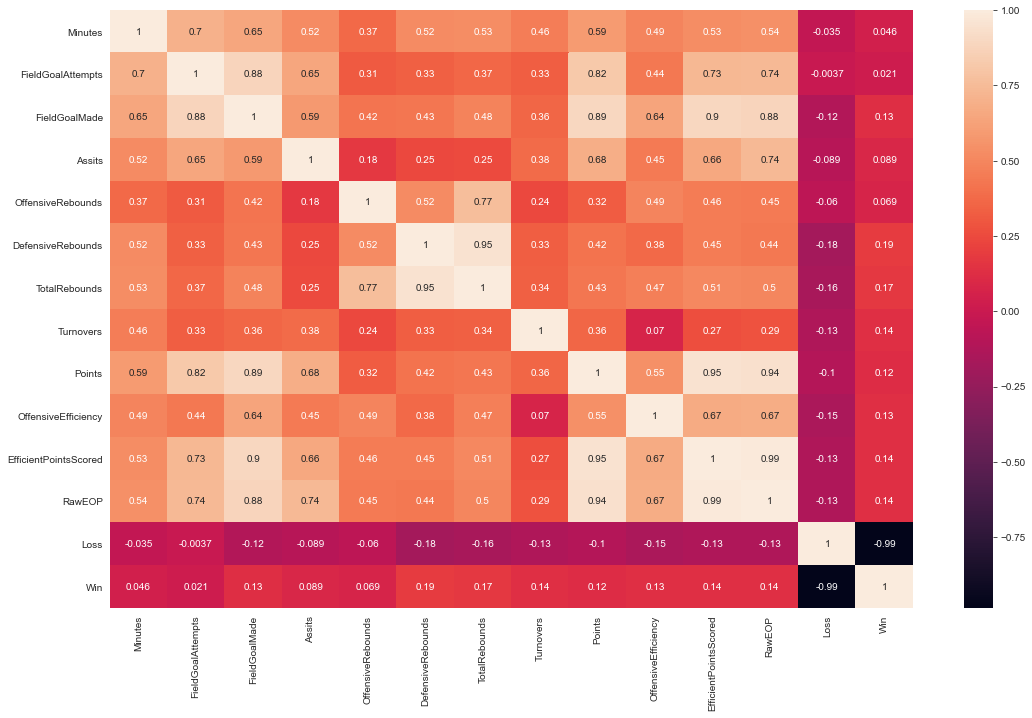

In [93]:
plt.figure(figsize=(18,11))
sns.heatmap(correlations, annot = True);

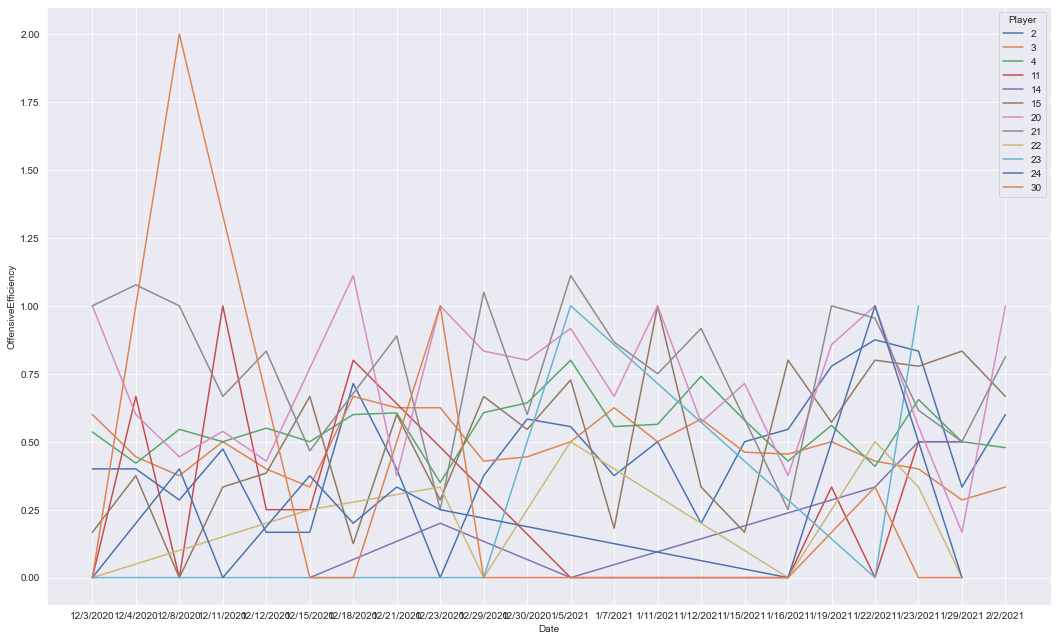

In [100]:
plt.figure(figsize = (18,11))
sns.lineplot(data = individual_stats, x = "Date", y = "OffensiveEfficiency", hue = "Player", palette = "deep");

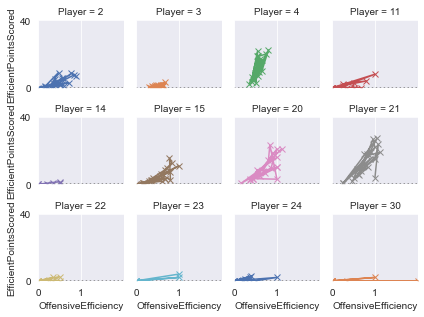

In [105]:
grid = sns.FacetGrid(individual_stats, col = "Player", hue = "Player", palette = "deep", col_wrap = 4, height = 1.5)
grid.map(plt.axhline, y = 0, ls = ":", c = ".5")
grid.map(plt.plot, "OffensiveEfficiency", "EfficientPointsScored", marker = "x")
grid.set(xticks = np.arange(2), yticks = [0, 40], xlim = (0, 2), ylim = (0, 40))
grid.fig.tight_layout(w_pad = 1)